## Figure 2c ##

This notebook contains the code needed to reproduce Figure 2c. The recreated figures are stored in the 'Fig2_figures' folder.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

The data required to reproduce this image is contained in two distinct files. 'fig2c_left_acg' contains only two columns: 'lags' and 'mean autocorrelogram'. This data is used to plot the solid red line. Data for each trial is contained in a separate file: 'fig2c_left_acg_trxtr'.

In [ ]:
file = pd.ExcelFile("Data_Fig2.xlsx")
df_mean = pd.read_excel(file, sheet_name="fig2c_left_acg")
print(df_mean.head())
df_mean.isna().sum() 
# no nulls

    lags   meanacg
0 -2.400  0.002341
1 -2.399  0.002329
2 -2.398  0.002334
3 -2.397  0.002346
4 -2.396  0.002357


lags       0
meanacg    0
dtype: int64

In [18]:
df_tr=pd.read_excel(file, sheet_name='fig2c_left_acg_trxtr',header= None)
df_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015926,0.017985,0.008154,-0.090564,0.173977,0.104580,0.055191,0.011418,0.067410,-0.117399
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015985,0.019397,0.008235,-0.090457,0.171676,0.105606,0.052596,0.010178,0.068698,-0.117722
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016044,0.020823,0.008316,-0.090350,0.169365,0.106620,0.049999,0.008939,0.069966,-0.118050
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016103,0.022264,0.008398,-0.090243,0.167044,0.107622,0.047399,0.007701,0.071214,-0.117795
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016163,0.023719,0.008479,-0.090135,0.164712,0.108611,0.044799,0.006465,0.072442,-0.117533


In [19]:
# Shape is n_lags x n_trials 
print('Number of time lags:',df_tr.shape[0])
print('Number of trials:', df_tr.shape[1])
df_tr.isna().sum()
# No nulls 

Number of time lags: 4801
Number of trials: 89


0     0
1     0
2     0
3     0
4     0
     ..
84    0
85    0
86    0
87    0
88    0
Length: 89, dtype: int64

In [ ]:
lags = df_mean['lags'].to_numpy()
meanacg = df_mean['meanacg'].to_numpy()
acg_trxtr= df_tr.to_numpy()

1.0


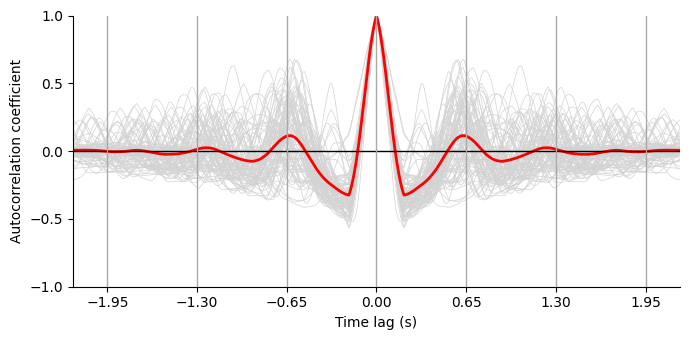

In [48]:
plt.figure(figsize=(7,3.5))
# grey lines: all trials
plt.plot(lags[:, None], acg_trxtr, linewidth=0.5, color='lightgray')
# red line: mean
plt.plot(lags, meanacg, linewidth=2, color='red')

# Formatting 
plt.axhline(0, color='black', linewidth=1)
for k in range(-3, 4):    # vertical lines every 0.65 s
    x = k * 0.65
    plt.axvline(x, color='darkgray', linewidth=1)

# Adjoust ticks
tick_x = np.arange(-3.25, 3.25 + 1e-6, 0.65)
plt.xticks(tick_x)
plt.yticks([-1,-0.5, 0, 0.5, 1])

# Set spines to be invisible 
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlim(-2.20, 2.20)
plt.ylim(-1, 1)
plt.xlabel("Time lag (s)")
plt.ylabel("Autocorrelation coefficient")
plt.tight_layout()
plt.show()


In [50]:
#Quick sanity check, in their graph it seemed that the autocorrelogram went much 
# higher than 1.0 but in the given data the maximum is 1!
print("Max of meanacg:", meanacg.max())

Max of meanacg: 1.0


In [51]:
plt.savefig('Fig2_figures/Fig2c', dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>